In [53]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

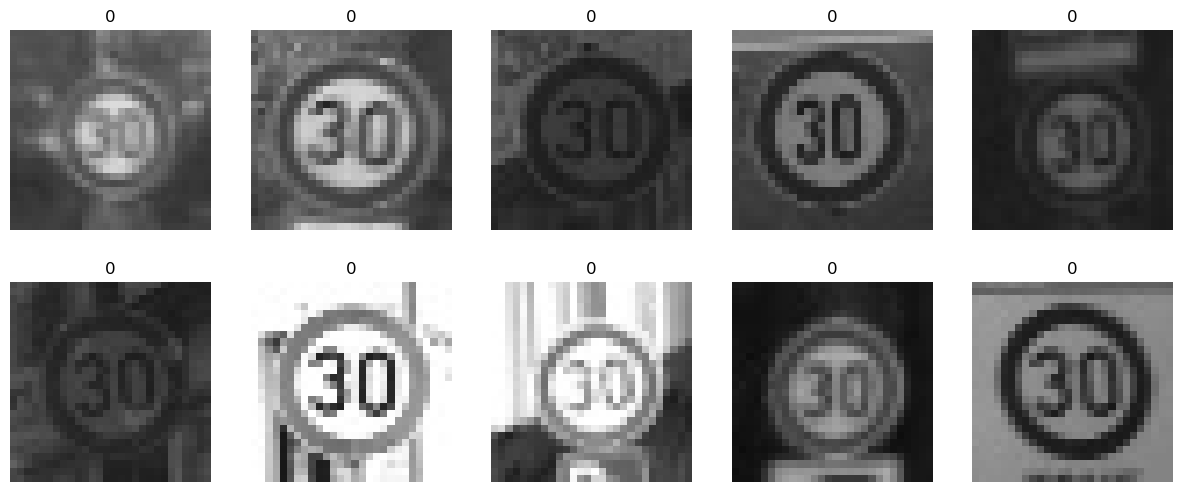

In [54]:
folder = '../data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

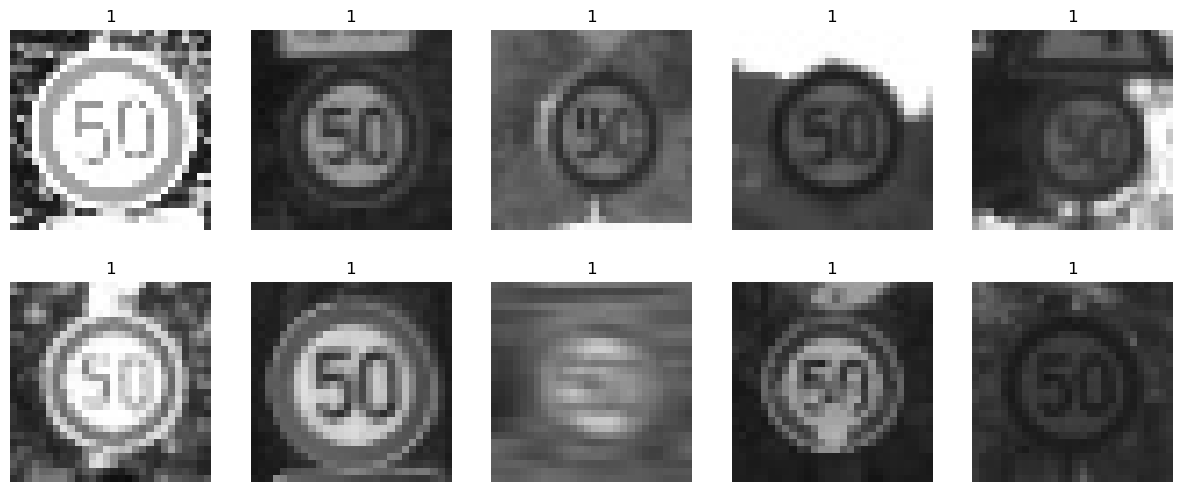

In [55]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [56]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [57]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [58]:
# now prepare for a single neuron training
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.008960962295532227


In [59]:
# Accuracy 0.8975391498881432
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
# Accuracy 0.9474272930648769
inputs = Input(shape=(pixels.shape[1],))
x = Dense(64, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(x)
model = Model(inputs, outputs)

model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,305 (196.50 KB)

 Trainable params: 50,305 (196.50 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Accuracy 0.9680089485458613
inputs = Input(shape=(pixels.shape[1],))
x = Dense(128, activation="relu")(inputs)
x = Dense(64, activation="relu")(x)
outputs = Dense(1, activation="linear")(x)

model = Model(inputs, outputs)

In [84]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [85]:
history = model.fit(pixels, labels, epochs=100, batch_size=32)

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.2878
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.1501
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.1165
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.1011
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0883
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 0.0781
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.0724
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.0847
Epoch 9/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.0706
Epoch 10/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0661
Epoch 11/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.0577
Epoch 12/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.0487
Epoch 13/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 0.0521
Epoch 14/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.0369
Epoch 15/100
14

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

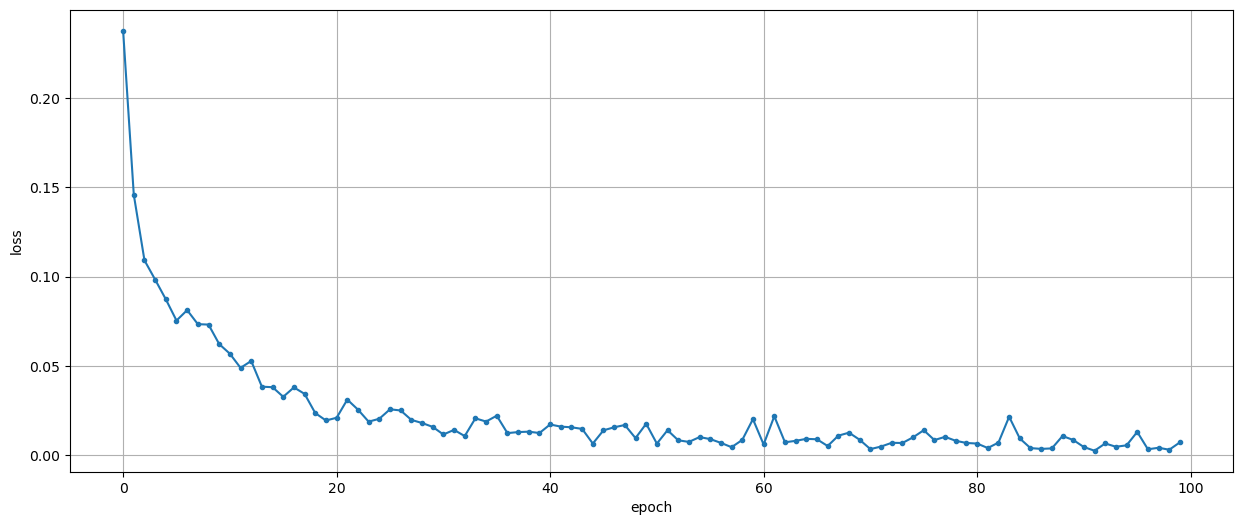

In [86]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[-5.7000024e-03 -5.5543799e-03  6.7053862e-02 -1.7416674e-03
 -1.5349608e-02 -2.3136556e-02 -5.1856129e-03 -6.0522831e-03
  1.3903943e-01 -1.2235690e-02 -7.0785624e-03  1.9164090e-01
 -6.8742884e-03 -7.3824376e-03  4.5890009e-01  9.0777524e-02
 -8.7926844e-03  1.0875748e-01  7.5604916e-02 -5.6446251e-03
 -7.1234908e-03 -5.7299952e-03 -1.1122118e-02 -3.7140425e-03
 -8.4570898e-03 -5.1534744e-03 -5.9937178e-03 -5.5391751e-03
  1.7440295e-01 -9.3682572e-02  5.9582483e-02 -1.3241107e-03
  4.5497715e-01 -1.0635054e-01 -3.9361104e-02 -5.1219361e-03
 -6.2835007e-03 -5.9878649e-03  1.0788066e-02  8.6133014e-03
 -5.6262845e-03  2.1905839e-01  3.5349257e-02  1.1316957e-01
 -1.8431472e-03 -5.2233203e-03 -7.3712184e-03 -5.2478085e-03
 -8.3284760e-03  7.9683609e-02 -5.7844194e-03 -6.3191806e-03
 -8.6992737e-03 -5.9209890e-03  1.2887591e-01  8.2144579e-03
 -6.0020867e-03 -2.2592091e-03 -4.3030284e-02 -4.4963625e-03
 -8.6046997e-03 -5.6096567e-03 -7.2174236e-02 -6.7748681e-02
 -2.4849078e-01  7.96008

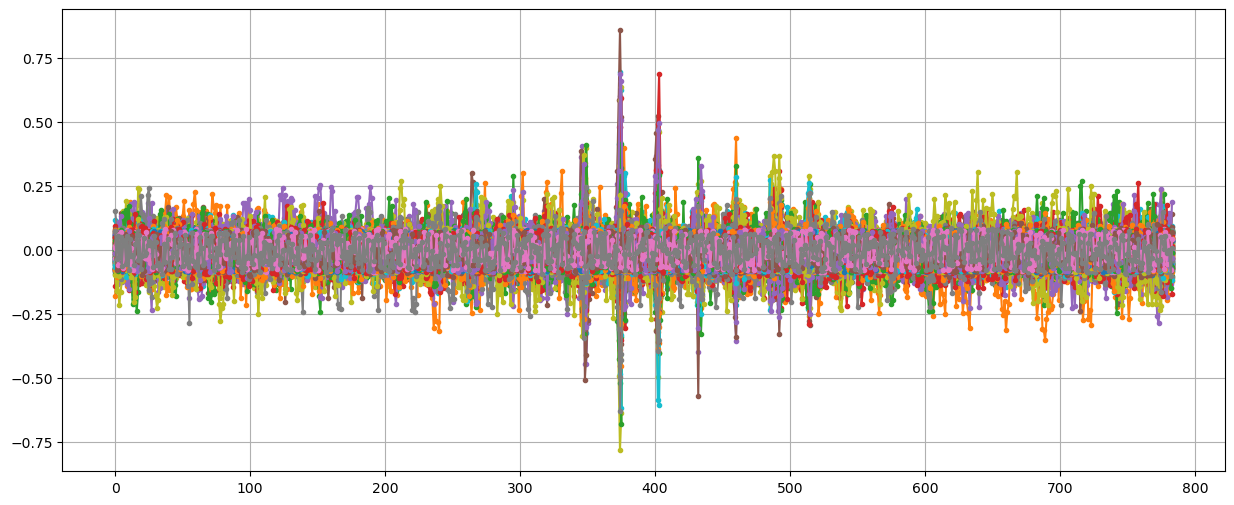

In [87]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [88]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step


In [89]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9595078299776286


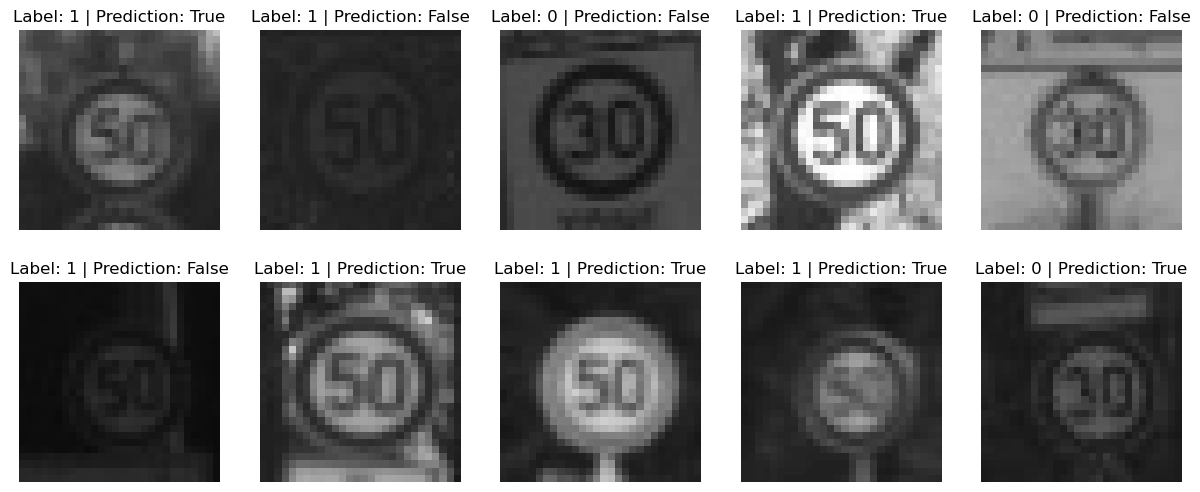

In [67]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)